<a href="https://colab.research.google.com/github/sbustos497/cd_202202_Santiago_Bustos/blob/master/Taller_K_de_Ripley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **La Función K de Ripley**
La función K, propuesta por Brian D. Ripley en 1976, representa la media observada del número de puntos dentro de una distancia definida dividida por la densidad de puntos en el área de estudio.

La forma general de la función K está dada por la ecuación:

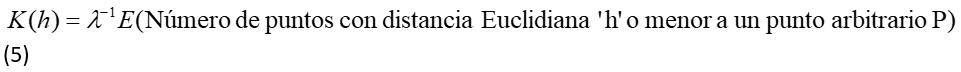

Donde λ es la densidad de puntos en el área. El valor de la función K para un fenómeno aleatoriamente distribuido es igual a πh^2.

Para estimar el valor de la función K se parte del valor estimado de E, denominado operador de expectación, que para espacios planos se estima mediante la ecuación:

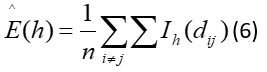

Donde h es la distancia máxima entre los puntos a ser tomada en consideración, n es el número total de puntos, dij es la distancia euclidiana entre dos puntos i y j, Ih() es una función de peso con valor uno (1) cuando la distancia entre los puntos es menor o igual a h y valor cero (0) cuando esta distancia es superior a h y R es el área del espacio estudiado. La densidad de puntos λ se puede estimar como:

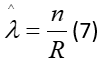

Al remplazar las funciones (6) y (7) sobre la función (5) se obtiene el estimador de la función K para espacios planos dado por la ecuación:

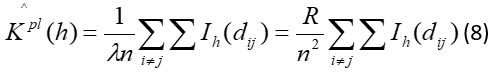

La siguiente figura muestra las distancias dij menores o iguales a h para dos puntos arbitrarios dentro del área de estudio.

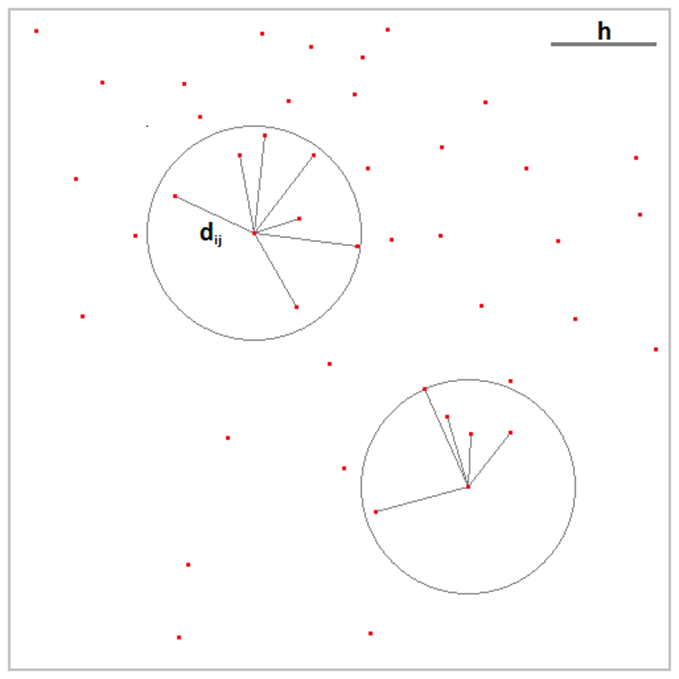

La función K puede ser utilizada para determinar si una serie de puntos ubicados sobre un espacio tienden a formar grupos o por el contrario se distribuye de forma aleatoria; una forma de poner a prueba estas afirmaciones es por medio de simulaciones de Monte Carlo. Para esto se genera una gran cantidad de conjuntos aleatorios de puntos sobre el mismo espacio (por ejemplo 1.000 conjuntos), la función K se aplica con diferentes valores de h (distancia máxima entre puntos a tenerse en cuenta) sobre cada uno de los conjuntos de datos aleatorios generados y sobre el conjunto original de puntos. Con los resultados de la función K sobre los conjuntos aleatorios para cada valor de h se definen intervalos de confianza, por ejemplo del 95% (entre el valor que ocupa el percentil 2,5 y el valor que ocupa el percentil 97,5), si el valor de la función K para el conjunto de datos original es superior al intervalo de confianza definido se puede concluir que existe tendencia estadísticamente significativa a formar agrupaciones y por lo tanto la distribución de los datos sobre el espacio no es aleatoria.

In [1]:
!pip install pyproj
!pip install cython
!pip install cartopy
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 4.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 41.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 44.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 37.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 44.6 MB

In [2]:
import pandas as pd #Handling and analysis of data structures
import pyproj #Proyection and conversion of geometries between coordinate reference system

In [3]:
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [4]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [5]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
#df

# Contar la cantidad de puntos con distancia igual o mayor de 100 mts.




In [6]:
#Función K de Ripley - Calcular E(Number the points) (Puntos cercanos 100 mts)
#Hallar landa
from decimal import DivisionByZero
from math import sqrt
def NearPoints(x_list, y_list, proximity):
  near_points = []
  if len(x_list) != len(y_list):
    raise ValueError(f'X list and Y list value does not match')
  for i in range(len(x_list)):
    near_points.append([])
    x0 = x_list[i]
    y0 = y_list[i]
    printList=[] #Validate
    for j in range(len(x_list)):
      if i != j:
        x1 = x_list[j]
        y1 = y_list[j]
        x = abs(x1 - x0)
        y = abs(y1 - y0)
        distance = sqrt(x**2 + y**2)
        if distance <= proximity:
          near_points[i].append((j, distance))
  return near_points;

In [7]:
near_points = NearPoints(df['x'], df['y'], 100)


In [8]:
near_points

[[(395, 69.59606980601369),
  (863, 42.179492673818636),
  (1096, 22.879578245261783),
  (1119, 6.746834603966513)],
 [(279, 58.589513691342376),
  (313, 43.38731821705459),
  (398, 52.577842354381026),
  (479, 47.936252415619656),
  (637, 50.54247986220128),
  (808, 91.33622617188665),
  (1006, 4.7127115527287)],
 [(352, 63.690407838938484),
  (410, 63.01483963808158),
  (472, 65.86985620612697),
  (913, 18.629803988494334),
  (927, 51.927341279751296),
  (1038, 77.06167536828195),
  (1052, 13.782995350919657),
  (1146, 6.249513904802736),
  (1226, 90.82155700360381)],
 [(528, 32.034972779503725)],
 [(297, 63.00196689997656),
  (821, 92.27810208275517),
  (917, 70.12719054371819)],
 [(14, 54.633133027151636),
  (144, 35.562247292298586),
  (571, 16.856569180189954)],
 [(106, 23.656444470134183),
  (111, 29.233044191538127),
  (115, 47.892055735010516),
  (211, 89.08258911698492),
  (447, 77.27161936942987),
  (503, 34.5556408191794),
  (689, 77.24387161622788),
  (704, 81.095254604278

In [9]:

import math
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade

import warnings
warnings.filterwarnings('ignore')
import time

In [10]:
# Obtain the remote shapefile files
import urllib.request

url = 'https://foscal.net/cartografia/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.qmd", "68276_urbano.shp","68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

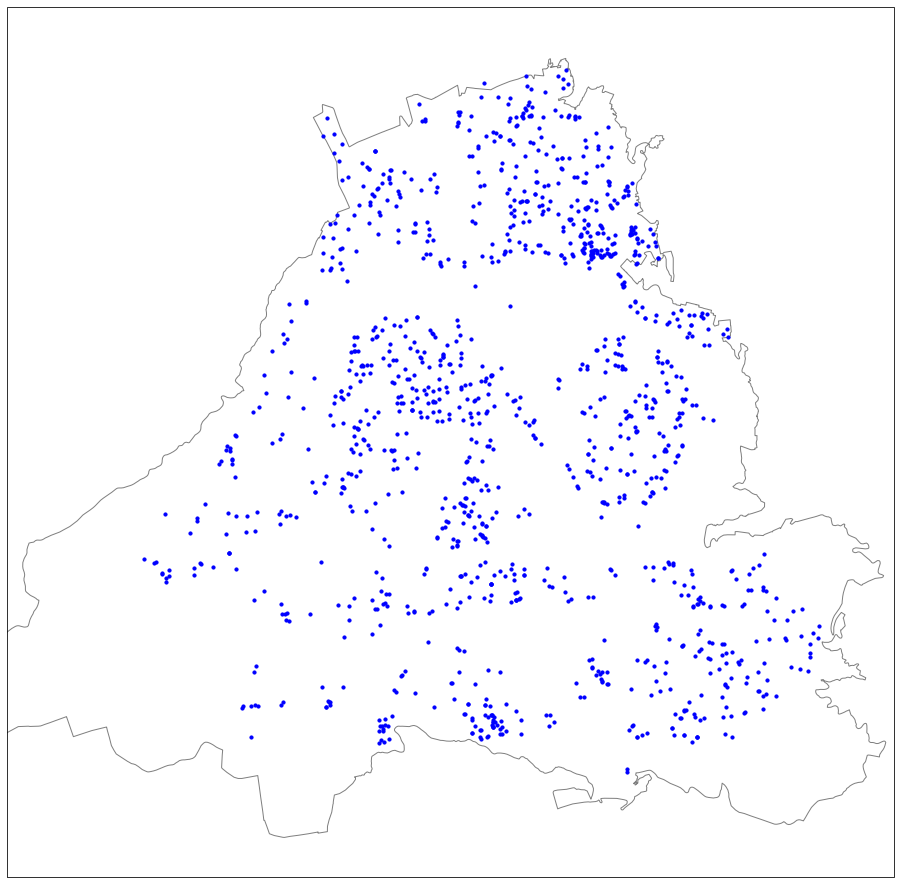

In [11]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Mapa de Floridablanca
lower_lon = -73.125
upper_lon = -73.073
lower_lat = 7.051
upper_lat = 7.102

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano')

for manzana in reader.geometries():
    ax.add_geometries([manzana], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

ax.add_line
plt.show()

In [12]:
from pyproj import Geod
from shapely import wkt

polyMap = ""
for x in reader.geometries():
  polyMap = x
  geod = Geod(ellps="WGS84")
  poly = wkt.loads('''\
POLYGON ((-116.904 43.371, -116.823 43.389, -116.895 43.407,
-116.908 43.375, -116.904 43.371))''')
  
  area = abs(geod.geometry_area_perimeter(poly)[0])

  print('# Geodesic area: {:.3f} m^2'.format(area))

# Geodesic area: 13205034.647 m^2


In [13]:
def funcionK (listaPuntos, area,h):
  #Se calcula el estimador E
  contK = 0
  for i in range(len(listaPuntos)-1):
    for j in range(i+1, len(listaPuntos)):
      if distancia(listaPuntos[i][0],listaPuntos[i][1],listarPuntos[j][0], listarPuntos[j][1])<=h:
        contK +=1

  valorK = contK * area / len(listaPuntos)**2
  return valorK

NameError: ignored

In [17]:
#Se copian las coordenadas de puntos en una lista de tuplas
listarPuntos = []
for i in range(df.shape[0]):
  listarPuntos.append((df["x"][i],df["y"][i]))


In [ ]:
listarPuntos

In [22]:
#Se genera un grupo de puntos aleatorios
t1 = time.time()

poligono = data_copy['geometry'][0]
listaAux = []
contAux = 0
while contAux < len(listarPuntos):
  tuplaAux = (random.random() * (x_max - x-min) + x_min, random.random() * (y_max - y_min) + y_min)
  puntoAux = Point (tuplaAux)
  if puntoAux.within (poligono):
    listaAux.append (tuplaAux)
    contAux += 1

# Se obtiene el valor k del conjunto aleatorio
listaK.append(funcionK(listaAux,area, h))
listaK

NameError: ignored